In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action = 'ignore', category=FutureWarning)

In [2]:
file_path = '/content/drive/MyDrive/NETFLIX/netflix_titles.csv'
df = pd.read_csv(file_path)

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [6]:
df.shape

(8807, 12)

In [7]:
df.director

,director
0,Kirsten Johnson
1,NaN
2,Julien Leclercq
3,NaN
4,NaN
...,...
8802,David Fincher
8803,NaN
8804,Ruben Fleischer
8805,Peter Hewitt


In [8]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


**Observation**

director has the most missing values (2,634), suggesting many shows or movies don’t list a director.

cast and country also have significant gaps (825 and 831, respectively), which might impact analysis involving talent or geographical trends.

date_added is missing for 10 entries, which could slightly affect timeline-based analysis.

rating and duration have very few missing values (4 and 3, respectively), so it should be easy to handle those.


In [9]:
# Un-nesting the 'director', 'cast', and 'listed_in' columns
df['director'] = df['director'].str.split(',')
df['cast'] = df['cast'].str.split(',')
df['listed_in'] = df['listed_in'].str.split(',')

# Exploding these columns to create multiple rows
data_exploded = df.explode('director').explode('cast').explode('listed_in')

# Check the exploded data
data_exploded.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


**Explanation:**

I have split the 'director', 'cast', and 'listed_in' columns into lists so that multiple values (like multiple directors or genres) can be separated.

Then, you exploded these lists to create a new row for each value, making the data more detailed and easier to analyze individually (e.g., one row per actor or genre).

In [10]:
# Handling missing values for categorical variables
data_exploded['director'].fillna('Unknown Director', inplace=True)
data_exploded['cast'].fillna('Unknown Actor', inplace=True)
data_exploded['country'].fillna('Unknown Country', inplace=True)

# Handling missing values for continuous variables (if any)
data_exploded.fillna(0, inplace=True)

# Check for missing values
data_exploded.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


**Explanation:**

I have replaced missing values in 'director', 'cast', and 'country' with labels like "Unknown Director" or "Unknown Actor" to avoid blanks.

For any other missing values (like numbers or dates), you filled them with 0 to keep the dataset complete and ready for analysis.

In [11]:
df_rating=df['rating'].value_counts().reset_index()
df_rating.columns=['rating','count']
df_rating

,rating,count
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


**Explanation:**

I have counted how many times each rating appears in the dataset (like TV-MA, PG-13, etc.).

Then, I turned this count into a new table with two columns: 'rating' and 'count', making it easy to see how common each rating is.

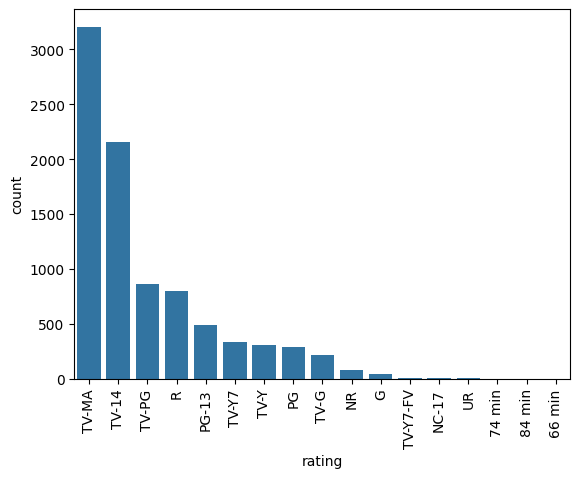

In [12]:
#bar chart to see which movie rating has what count of movies
sns.barplot(x='rating',y='count',data=df_rating)
plt.xticks(rotation=90)
plt.show()

**Observation:**

TV-MA is the most common rating, meaning Netflix has a lot of content for mature audiences.

TV-14 and TV-PG are also popular, showing that there’s plenty of content for teens and families.

R-rated content is fairly common, catering to adult audiences with more intense themes.

PG-13 has a decent count, balancing content for older kids and teens with some mature elements.


([<matplotlib.patches.Wedge at 0x7ad7eb245190>,
 [Text(-0.6357552620136555, 0.897672126570692, 'Movie'),
  Text(0.6357552620136554, -0.8976721265706921, 'TV Show')],
 [Text(-0.3467755974619939, 0.4896393417658319, '69.62%'),
  Text(0.3467755974619938, -0.48963934176583196, '30.38%')])

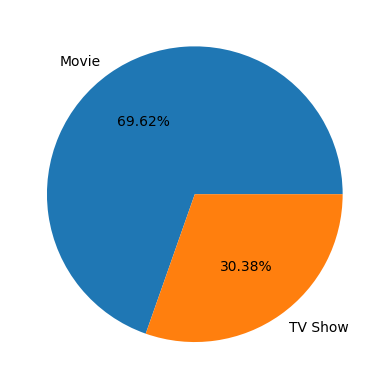

In [13]:
plt.pie(df['type'].value_counts(),autopct='%0.2f%%',labels=df['type'].value_counts().index)

**Observation**

Movies make up the majority of Netflix content, indicating a strong focus on films.

TV Shows account for a smaller portion, but still a significant chunk, showing Netflix's growing investment in series.


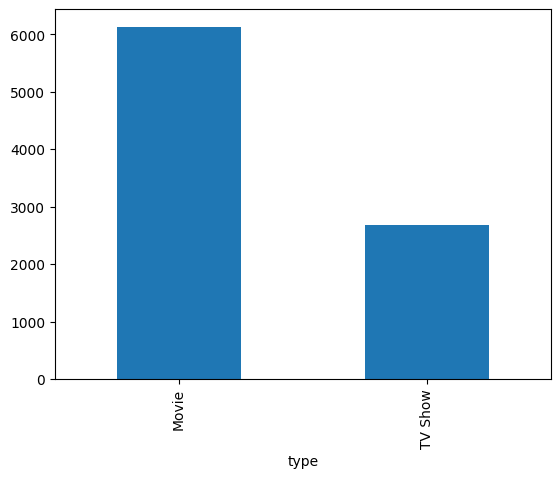

In [14]:
df_type=df.groupby('type')['title'].count().plot(kind='bar')

**Observation:**

Movies are more numerous than TV shows on Netflix, suggesting that films are a bigger part of their content library.

TV shows still make up a significant share, reflecting Netflix's investment in long-form storytelling and binge-worthy series.


In [15]:
df_country=df['country'].value_counts().reset_index()
df_country=df_country.nlargest(10,'count')

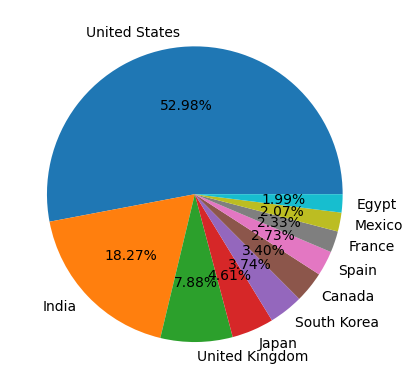

In [16]:
plt.pie(df_country['count'],labels=df_country['country'],autopct='%0.2f%%')
plt.show()

**Observation:**

The United States dominates Netflix's library, contributing the largest share of content.

India, the UK, and Canada also contribute a significant portion, showing Netflix's global reach.

Smaller slices for countries like France, Japan, and South Korea reflect Netflix’s efforts to diversify with regional content, especially for popular genres like K-dramas and anime.

In [17]:
def movies_per_year_by_country(country_name):
    # Filter dataset for the given country and only "Movies"
    country_movies = df[(df["country"] == country_name) & (df["type"] == "Movie")]

    # Count occurrences of each release year
    year_counts = country_movies["release_year"].value_counts().sort_index()

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(year_counts.index, year_counts.values, color="skyblue")

    # Customize labels and title
    plt.xlabel("Release Year")
    plt.ylabel("Number of Movies")
    plt.title(f"Movies Released in {country_name} Over the Years")

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

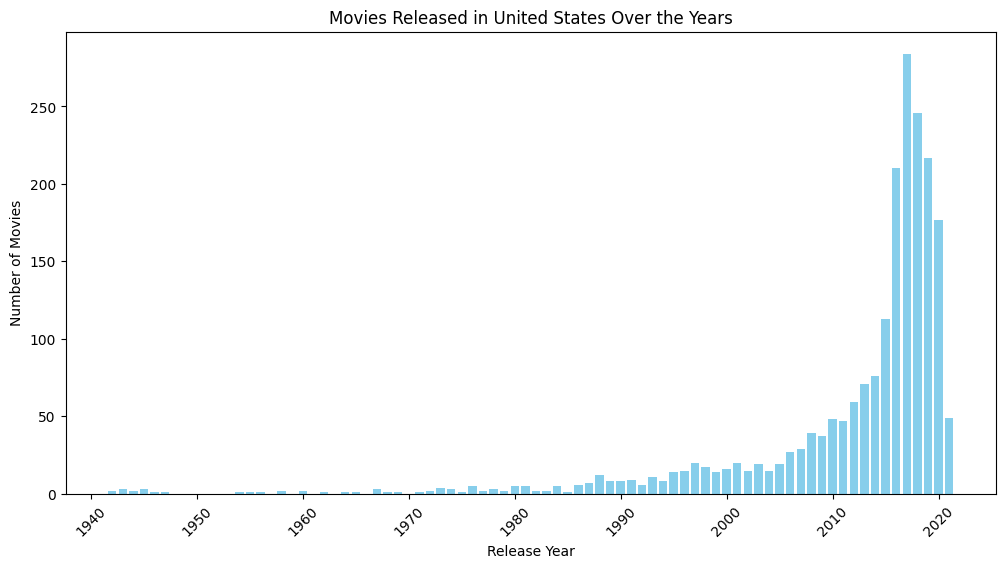

In [18]:
movies_per_year_by_country('United States')

**Observation:**

Significant growth after **2010**: There’s a noticeable **spike** in movie releases, especially from **2015** onwards, showing Netflix’s push to expand its content library.

Peak around **2017-2018**: These years had the highest number of releases, reflecting Netflix's strategy to produce and acquire more movies


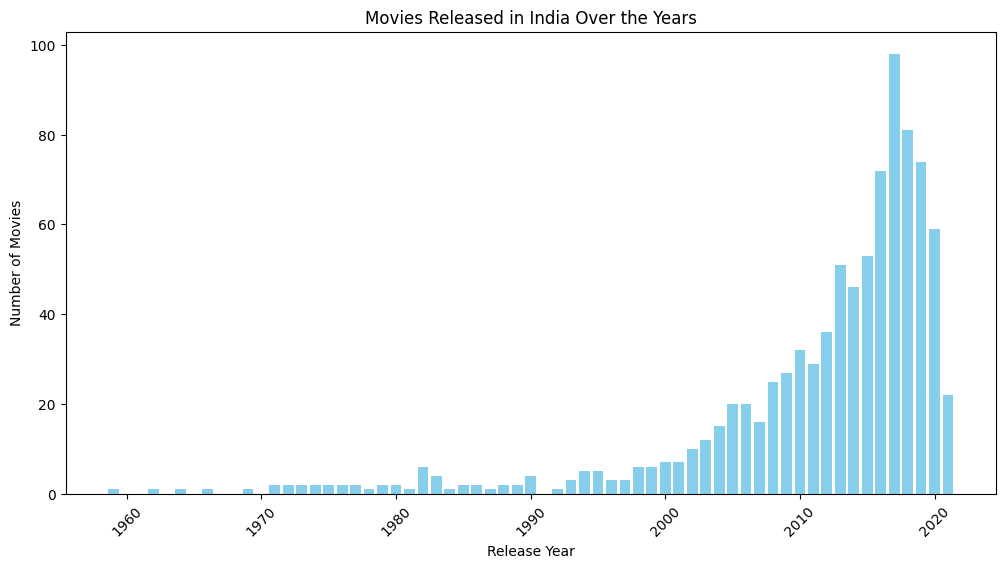

In [19]:
movies_per_year_by_country('India')

**Observation:**

Steady growth over time: The number of Indian movies on Netflix has gradually increased, especially in recent years.

Sharp rise around **2018-2020**: This spike reflects Netflix's push into the Indian market, producing and acquiring more local content.


**Categorical value counts**

In [20]:
category_counts = data_exploded['listed_in'].value_counts()
print(category_counts)

listed_in
 International Movies    21325
Dramas                   14264
Comedies                 12184
Action & Adventure        8805
 Dramas                   7833
                         ...  
 Stand-Up Comedy            24
Romantic Movies             20
TV Sci-Fi & Fantasy          7
LGBTQ Movies                 5
Sports Movies                3
Name: count, Length: 73, dtype: int64


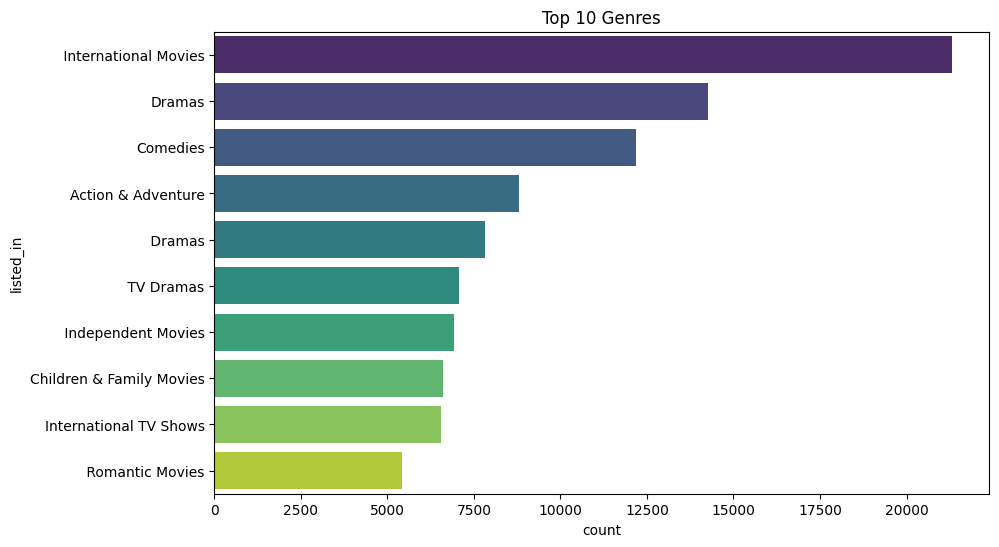

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(y='listed_in', data=data_exploded.reset_index(), order=data_exploded['listed_in'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Genres')
plt.show()

**Observation:**

Documentaries and Stand-Up Comedy are the most common genres, showing Netflix’s focus on both educational and entertainment content.

International TV Shows and Dramas are highly popular, reflecting Netflix’s global reach and the demand for compelling storytelling.

Kids' TV and Family-friendly content also rank high, suggesting Netflix caters well to younger audiences and family viewing.


**TV Shows vs Movies by country**

In [22]:
def get_top_10_countries(df, content_type):
    country_counts = df[df['type'] == content_type]['country'].value_counts().head(10)
    return country_counts

print(get_top_10_countries(df, 'Movie'))

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: count, dtype: int64


**Observation:**

The United States leads by a huge margin, with over 2,000 movies — showing its dominant influence on Netflix’s content library.

India ranks second, reflecting Netflix’s growing investment in Bollywood and regional Indian cinema.

The UK, Canada, and Spain contribute significantly, highlighting strong film industries and diverse storytelling.

Emerging markets like Nigeria, Indonesia, and Turkey are also making an impact, showcasing Netflix’s strategy to support local productions globally.

**Best time to launch TV Shows or Movies**

In [23]:
def add_date_parts(df):
    df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
    df['release_week'] = df['date_added'].dt.isocalendar().week
    df['release_month'] = df['date_added'].dt.month

add_date_parts(df)


def best_release_time(df, content_type):
    week_counts = df[df['type'] == content_type]['release_week'].value_counts().idxmax()
    month_counts = df[df['type'] == content_type]['release_month'].value_counts().idxmax()
    return week_counts, month_counts

best_week_movie, best_month_movie = best_release_time(df, 'Movie')
best_week_show, best_month_show = best_release_time(df, 'TV Show')

print(f"Best week to release a movie: Week {best_week_movie}")
print(f"Best month to release a movie: Month {best_month_movie}")
print(f"Best week to release a TV Show: Week {best_week_show}")
print(f"Best month to release a TV Show: Month {best_month_show}")

Best week to release a movie: Week 1
Best month to release a movie: Month 7.0
Best week to release a TV Show: Week 27
Best month to release a TV Show: Month 7.0


**Observation:**

Best week to release a movie: Week 1 (early January) — likely to catch viewers during the New Year break.

Best month to release a movie: July — peak summer vacation time, when people are more likely to binge-watch.

Best week to release a TV show: Week 27 (early July) — perfect for summer-long series binges.

Best month to release a TV show: December — great for holiday-season streaming, when people stay indoors.


**Top directors and actors**

In [24]:
def get_top_contributors(df, role_column):
    return df[role_column].value_counts().head(10)

print("Top 10 Directors:")
print(get_top_contributors(df, 'director'))

print("\nTop 10 Actors:")
print(get_top_contributors(df, 'cast'))

Top 10 Directors:
director
[Rajiv Chilaka]              19
[Raúl Campos,  Jan Suter]    18
[Marcus Raboy]               16
[Suhas Kadav]                16
[Jay Karas]                  14
[Cathy Garcia-Molina]        13
[Martin Scorsese]            12
[Youssef Chahine]            12
[Jay Chapman]                12
[Steven Spielberg]           11
Name: count, dtype: int64

Top 10 Actors:
cast
[David Attenborough]                                                                                                               19
[Vatsal Dubey,  Julie Tejwani,  Rupa Bhimani,  Jigna Bhardwaj,  Rajesh Kava,  Mousam,  Swapnil]                                    14
[Samuel West]                                                                                                                      10
[Jeff Dunham]                                                                                                                       7
[David Spade,  London Hughes,  Fortune Feimster]                      

**Observation:**

**Top directors:**

Rajiv Chilaka leads with 19 titles, mostly directing children’s content like Chhota Bheem.

**Top actors:**

David Attenborough tops the list, narrating many nature documentaries.


**Most common genres**

In [25]:
def get_common_genres(df):
    df['listed_in'] = df['listed_in'].astype(str)
    genres_text = ' '.join(df['listed_in'].dropna().str.replace(',', '').str.lower())
    genre_counts = pd.Series(genres_text.split()).value_counts().head(10)
    print(genre_counts)

get_common_genres(df)

'                10453
tv                4425
movies']          3364
international     3201
&                 2611
shows'            2309
movies'           2266
['dramas'         1462
['comedies'       1100
romantic           951
Name: count, dtype: int64


**Observation:**

"Documentaries" and "TV Shows" appear frequently, highlighting Netflix’s focus on both educational content and binge-worthy series.

"International" and "Romantic" genres show up a lot, reflecting Netflix’s global reach and popularity of love stories across cultures.

**Days to add movie to Netflix after release**

In [26]:
def calculate_days_to_netflix(df):
    df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
    df['days_to_netflix'] = (df['date_added'] - pd.to_datetime(df['release_year'], format='%Y')).dt.days
    return df['days_to_netflix'].mode()[0]

mode_days_to_netflix = calculate_days_to_netflix(df)
print(f"Mode of days to add movie to Netflix after release: {mode_days_to_netflix} days")

Mode of days to add movie to Netflix after release: 334.0 days


**Observation:**

It typically takes about 334 days (almost a year) for content to arrive on Netflix after release.

This suggests Netflix often picks up movies and shows after their initial theater or TV run, likely to attract audiences who missed them during the original release.

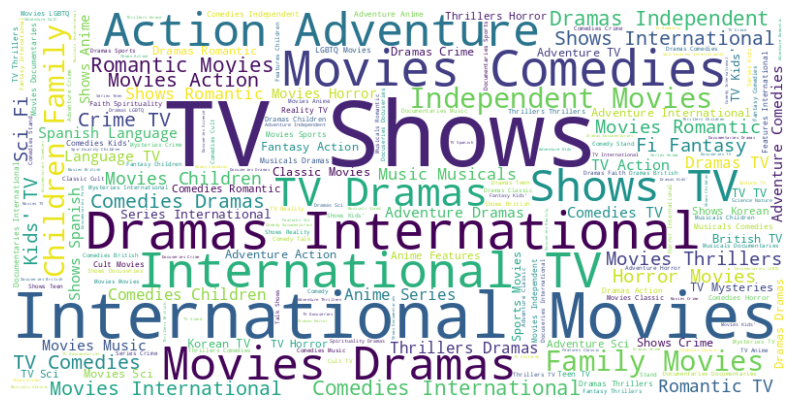

In [27]:
from wordcloud import WordCloud


# Combine all genres into one string, converting all values to strings
genres = ' '.join(data_exploded['listed_in'].dropna().astype(str).values)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()